### HR - Attrition Analytics -  Exploratory Analysis & Predictive Modeling
> Human Resources are critical resources of any organiazation. Organizations spend huge amount of time and money to hire <br>
> and nuture their employees. It is a huge loss for companies if employees leave, especially the key resources.  <br>
> So if HR can predict weather employees are at risk for leaving the company, it will allow them to identify the attrition  <br>
> risks and help understand and provie necessary support to retain those employees or do preventive hiring to minimize the  <br>
> impact to the orgranization.

### DATA ATRRIBUTES

satisfaction_level: Employee satisfaction level <br>
last_evaluation: Last evaluation  <br>
number_project: Number of projects  <br>
average_montly_hours: Average monthly hours <br>
time_spend_company: Time spent at the company <br>
Work_accident: Whether they have had a work accident <br>
promotion_last_5years: Whether they have had a promotion in the last 5 years <br>
department: Department <br>
salary: Salary <br>
left: Whether the employee has left <br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
hr_df = pd.read_csv( 'HR_comma_sep.csv' )

In [3]:
hr_df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [4]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
hr_df1 = pd.get_dummies(hr_df, columns=['department', 'salary'], drop_first=True)

In [6]:
hr_df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
X = hr_df1[hr_df1.columns.difference(['left'])]

In [8]:
Y = hr_df1[['left']]

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=123)

In [13]:
train_X.shape

(11999, 18)

In [14]:
train_y.shape

(11999, 1)

In [15]:
model = KNeighborsClassifier(n_neighbors=5, weights='distance')
model = model.fit(train_X, train_y)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [16]:
train_pred_cat = model.predict(train_X)

In [17]:
train_pred_prob = model.predict_proba(train_X)

In [18]:
train_pred_prob[:,1]

array([0., 0., 1., ..., 1., 0., 0.])

In [19]:
metrics.roc_auc_score(train_y, train_pred_prob[:,1])

1.0

In [20]:
print(metrics.classification_report(train_y,train_pred_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9137
           1       1.00      1.00      1.00      2862

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [21]:
#Test

In [22]:
test_pred_cat = model.predict(test_X)

In [23]:
test_pred_prob = model.predict_proba(test_X)

In [24]:
metrics.roc_auc_score(test_y, test_pred_prob[:,1])

0.9822784194483964

In [25]:
metrics.confusion_matrix(test_y,test_pred_cat)

array([[2169,  122],
       [  22,  687]], dtype=int64)

In [26]:
print(metrics.classification_report(test_y,test_pred_cat))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2291
           1       0.85      0.97      0.91       709

    accuracy                           0.95      3000
   macro avg       0.92      0.96      0.94      3000
weighted avg       0.96      0.95      0.95      3000



### Using GridsearchCV

In [27]:
grid = {'n_neighbors': [3,4,5,6,7,8,9,10], 'weights': ['distance', 'uniform']}

model = GridSearchCV(KNeighborsClassifier(), grid, cv=5, scoring='roc_auc')
model = model.fit(train_X, train_y)

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was

In [28]:
model.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [29]:
model.best_score_

0.9822598730634596

In [30]:
#Building best model with best parameters

In [31]:
model = KNeighborsClassifier(n_neighbors=10, weights='distance')
model = model.fit(train_X, train_y)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [32]:
#Train

In [33]:
train_pred_cat = model.predict(train_X)

In [34]:
train_pred_prob = model.predict_proba(train_X)

In [35]:
metrics.roc_auc_score(train_y, train_pred_prob[:,1])

1.0

In [36]:
print(metrics.classification_report(train_y,train_pred_cat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9137
           1       1.00      1.00      1.00      2862

    accuracy                           1.00     11999
   macro avg       1.00      1.00      1.00     11999
weighted avg       1.00      1.00      1.00     11999



In [37]:
#Test

In [38]:
test_pred_cat = model.predict(test_X)

In [39]:
test_pred_prob = model.predict_proba(test_X)

In [40]:
metrics.roc_auc_score(test_y, test_pred_prob[:,1])

0.9853538621416114

In [41]:
metrics.confusion_matrix(test_y,test_pred_cat)

array([[2187,  104],
       [  19,  690]], dtype=int64)

In [42]:
print(metrics.classification_report(test_y,test_pred_cat))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2291
           1       0.87      0.97      0.92       709

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.95      3000
weighted avg       0.96      0.96      0.96      3000



### Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [45]:
DecisionTreeClassifier?

In [48]:
model = DecisionTreeClassifier(max_depth=5)
model = model.fit(train_X, train_y)

In [32]:
#Train

In [49]:
train_pred_cat = model.predict(train_X)

In [50]:
train_pred_prob = model.predict_proba(train_X)

In [51]:
metrics.roc_auc_score(train_y, train_pred_prob[:,1])

0.9764832011693724

In [52]:
print(metrics.classification_report(train_y,train_pred_cat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9137
           1       0.97      0.93      0.95      2862

    accuracy                           0.98     11999
   macro avg       0.97      0.96      0.97     11999
weighted avg       0.98      0.98      0.98     11999



In [37]:
#Test

In [53]:
test_pred_cat = model.predict(test_X)

In [54]:
test_pred_prob = model.predict_proba(test_X)

In [55]:
metrics.roc_auc_score(test_y, test_pred_prob[:,1])

0.9761500050174873

In [56]:
metrics.confusion_matrix(test_y,test_pred_cat)

array([[2263,   28],
       [  50,  659]], dtype=int64)

In [57]:
print(metrics.classification_report(test_y,test_pred_cat))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2291
           1       0.96      0.93      0.94       709

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [58]:
#Tune the parameters using Gridsearch

In [59]:
DecisionTreeClassifier?

In [60]:
grid = {'max_depth': [3,4,5,6,7,8,9,10], 'min_samples_split': [10,20,30,40,50]}

model = GridSearchCV(DecisionTreeClassifier(), grid, cv=5, scoring='roc_auc')
model = model.fit(train_X, train_y)

In [72]:
model.best_params_

{'max_depth': 7, 'min_samples_split': 40}

In [73]:
model.best_score_

0.982243948778219

In [61]:
#Train

In [62]:
train_pred_cat = model.predict(train_X)

In [63]:
train_pred_prob = model.predict_proba(train_X)

In [64]:
metrics.roc_auc_score(train_y, train_pred_prob[:,1])

0.9862462635889568

In [65]:
print(metrics.classification_report(train_y,train_pred_cat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9137
           1       0.99      0.92      0.96      2862

    accuracy                           0.98     11999
   macro avg       0.98      0.96      0.97     11999
weighted avg       0.98      0.98      0.98     11999



In [66]:
#Test

In [67]:
test_pred_cat = model.predict(test_X)

In [68]:
test_pred_prob = model.predict_proba(test_X)

In [69]:
metrics.roc_auc_score(test_y, test_pred_prob[:,1])

0.9869197491379463

In [70]:
metrics.confusion_matrix(test_y,test_pred_cat)

array([[2284,    7],
       [  57,  652]], dtype=int64)

In [71]:
print(metrics.classification_report(test_y,test_pred_cat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2291
           1       0.99      0.92      0.95       709

    accuracy                           0.98      3000
   macro avg       0.98      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [74]:
# Best model based on the gridsearch

In [76]:
model = DecisionTreeClassifier(max_depth=7, min_samples_split=40)
model = model.fit(train_X, train_y)


In [77]:
model.feature_importances_

array([0.00000000e+00, 6.63608604e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.57329514e-05, 8.23473487e-05, 1.47347157e-01,
       1.07409278e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.32063986e-01, 1.46680638e-01])

In [78]:
train_X.columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [83]:
var_imp = pd.concat([pd.Series(train_X.columns, name='Feature'),  pd.Series(model.feature_importances_, name='importance')], axis=1)

In [85]:
var_imp.sort_values('importance', ascending=False)

,Feature,importance
16,satisfaction_level,0.532064
11,last_evaluation,0.147347
17,time_spend_company,0.146681
12,number_project,0.107409
1,average_montly_hours,0.066361
10,department_technical,0.000082
9,department_support,0.000056
7,department_product_mng,0.000000
8,department_sales,0.000000
6,department_marketing,0.000000


### Generate Rules from Decision Trees

#### To create a decision tree visualization graph.
- Install GraphViz (As per the OS and version you are using)
- pip install pydotplus
- Add the path to environmental variables
- Note: The notebook needs a restart.

In [86]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [87]:
# Exporting the tree output in the form opendocument
export_graphviz( model,
              out_file = "HR_decision_tree.odt",
              feature_names = train_X.columns )

In [88]:
# Converting open document file to jpg imanage
import pydotplus as pdot
HR_tree_graph = pdot.graphviz.graph_from_dot_file( 'HR_decision_tree.odt' )

In [89]:
HR_tree_graph.write_jpg( 'HR_tree.jpg' )

True

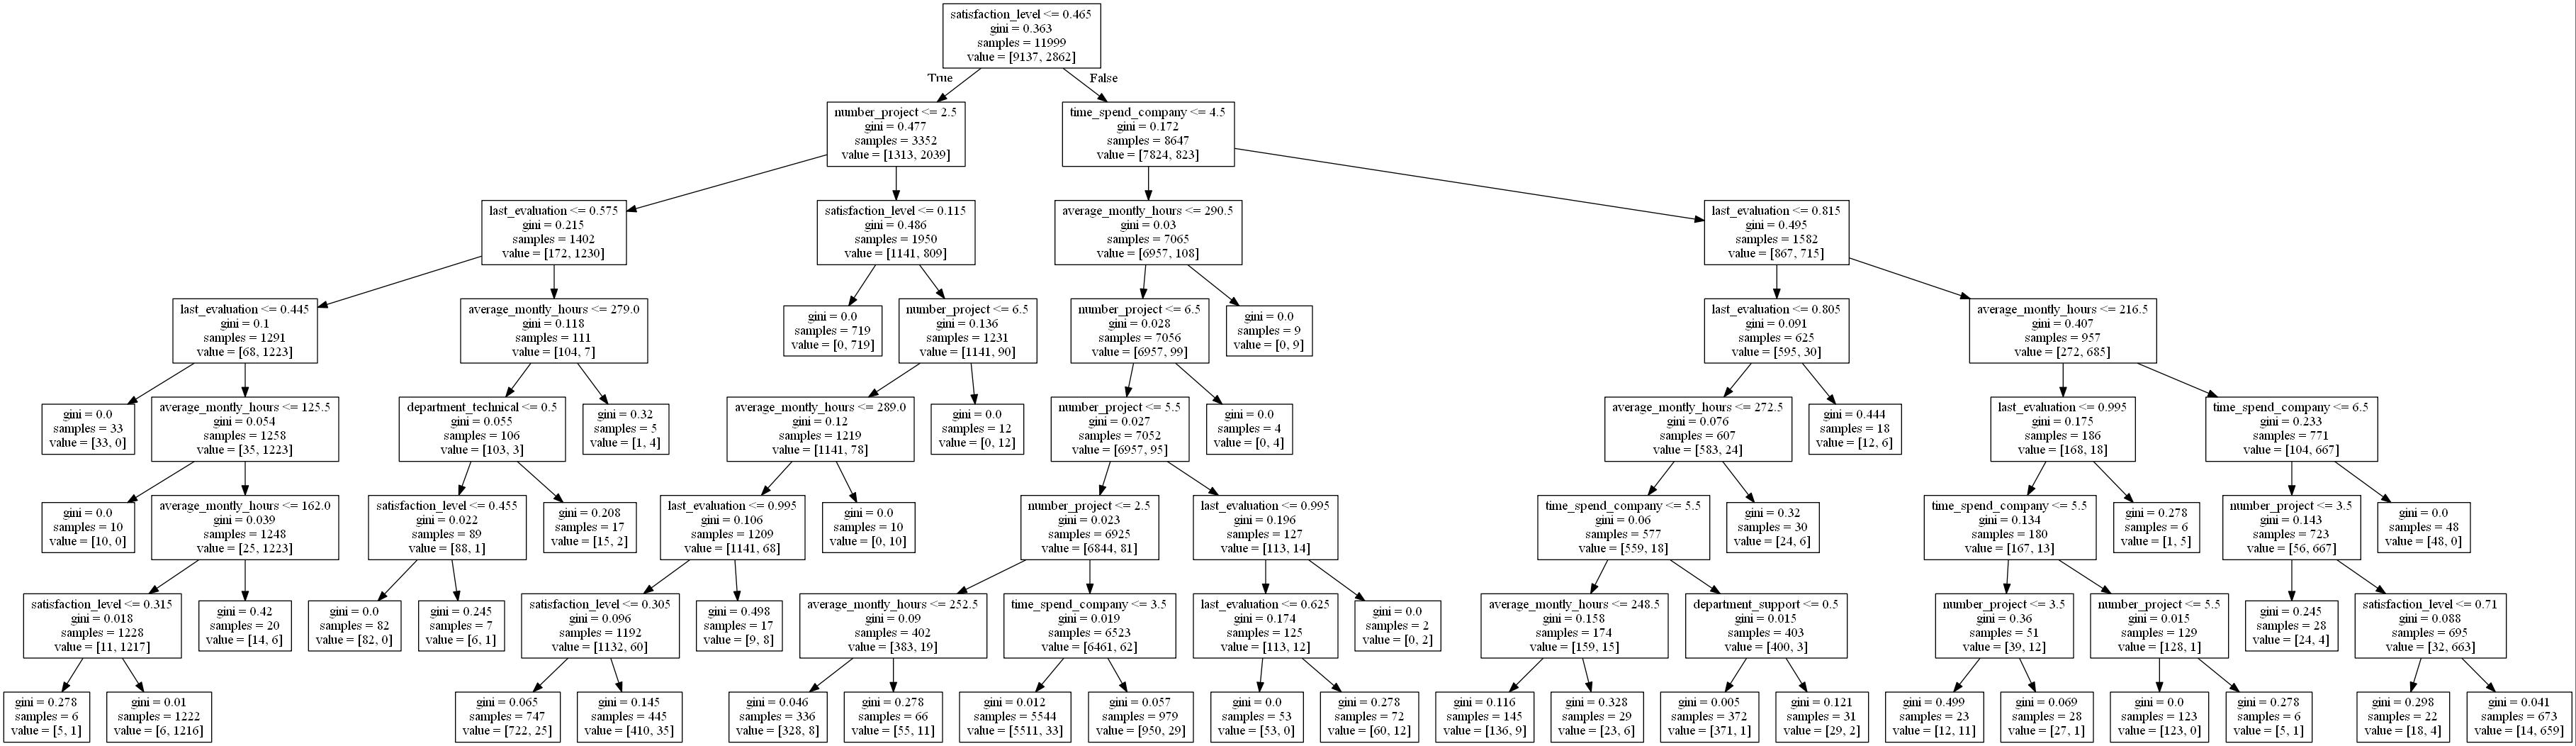

In [90]:
# Viewing the image in the notebook (display the image)
from IPython.display import Image
Image(filename='HR_tree.jpg')

In [ ]:
#Home work
#Take regression problem from linear regression class, perform KNN Regression and Decision Tree Regression